> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [3]:
# 🔧 Add code here


--- Naive Bayes with test_size=0.2 ---
Confusion Matrix:
 [[15 12]
 [ 8 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45

Accuracy: 0.5555555555555556

--- Naive Bayes with 'celebrity' and 'funny' features removed (test_size=0.2) ---
Confusion Matrix:
 [[13 14]
 [ 9  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.39      0.50      0.44        18

    accuracy                           0.49        45
   macro avg       0.49      0.49      0.48        45
weighted avg       0.51      0.49      0.49        45

Accuracy: 0.4888888888888889


### ✍️ Your Response: 🔧
1. Based on the execution of the code in the previous step:

Original Naive Bayes (test_size=0.3): Accuracy was approximately 0.49.
Naive Bayes with test_size=0.2 (all features): This setup achieved the best accuracy at approximately 0.56.
Naive Bayes with test_size=0.2 and 'celebrity' and 'funny' features removed: The accuracy dropped to approximately 0.49.
Therefore, the model setup that performed best was the Naive Bayes classifier with a test_size of 0.2, using all the original logical features.

This improvement in accuracy when reducing test_size from 0.3 to 0.2 might be because a larger proportion of the data was used for training (80% vs. 70%), allowing the model to learn more patterns from the dataset. However, it's also worth noting that a smaller test set can sometimes lead to more variability in the reported accuracy. The decrease in accuracy after removing 'celebrity' and 'funny' suggests these features were somewhat helpful for the model in making predictions.




## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [5]:
# 🔧 Add code here:



--- SVM with Linear Kernel (C=0.1) ---
Confusion Matrix:
 [[20 18]
 [18 12]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        38
           1       0.40      0.40      0.40        30

    accuracy                           0.47        68
   macro avg       0.46      0.46      0.46        68
weighted avg       0.47      0.47      0.47        68

Accuracy: 0.47058823529411764

--- SVM with Linear Kernel (C=10) ---
Confusion Matrix:
 [[20 18]
 [15 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        38
           1       0.45      0.50      0.48        30

    accuracy                           0.51        68
   macro avg       0.51      0.51      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411

--- SVM with Polynomial Kernel (C=1) ---
Confusion Matrix:
 [[24 14]
 [16 14]]

C

### ✍️ Your Response: 🔧
1. Tradeoff between higher and lower values of C:

Higher C values (e.g., C=10): A higher C tells the SVM to penalize misclassifications more heavily. This means the model will try harder to classify all training examples correctly, potentially leading to a more complex decision boundary. While this might achieve very low training error, it increases the risk of overfitting, especially with noisy data, meaning it might not generalize well to unseen data.
Lower C values (e.g., C=0.1): A lower C allows for more misclassifications during training. This encourages a simpler decision boundary with a wider margin, which can lead to better generalization and reduced overfitting. However, if C is too low, the model might underfit, meaning it's too simple to capture the underlying patterns in the data.
Which value of C gave you the best Accuracy? Based on the executed code:

Original RBF Kernel (C=1.0): Accuracy = 0.5147
Linear Kernel (C=0.1): Accuracy = 0.4706
Linear Kernel (C=10): Accuracy = 0.5147
Polynomial Kernel (C=1): Accuracy = 0.5588
The Polynomial Kernel with C=1 yielded the best accuracy of approximately 0.5588 among the tested configurations.




## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4914 - loss: 0.6909 - val_accuracy: 0.5735 - val_loss: 0.6828
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4877 - loss: 0.6930 - val_accuracy: 0.5735 - val_loss: 0.6833
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5329 - loss: 0.6905 - val_accuracy: 0.5294 - val_loss: 0.6835
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5296 - loss: 0.6924 - val_accuracy: 0.5588 - val_loss: 0.6838
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5365 - loss: 0.6898 - val_accuracy: 0.5147 - val_loss: 0.6840
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5550 - loss: 0.6851 - val_accuracy: 0.5147 - val_loss: 0.6840
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5478 - loss: 0.6914 - val_accuracy: 0.5294 - val_loss: 0.6843
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6290 - loss: 0.6811 - val_accuracy: 0.5147 - val_loss: 0.6841


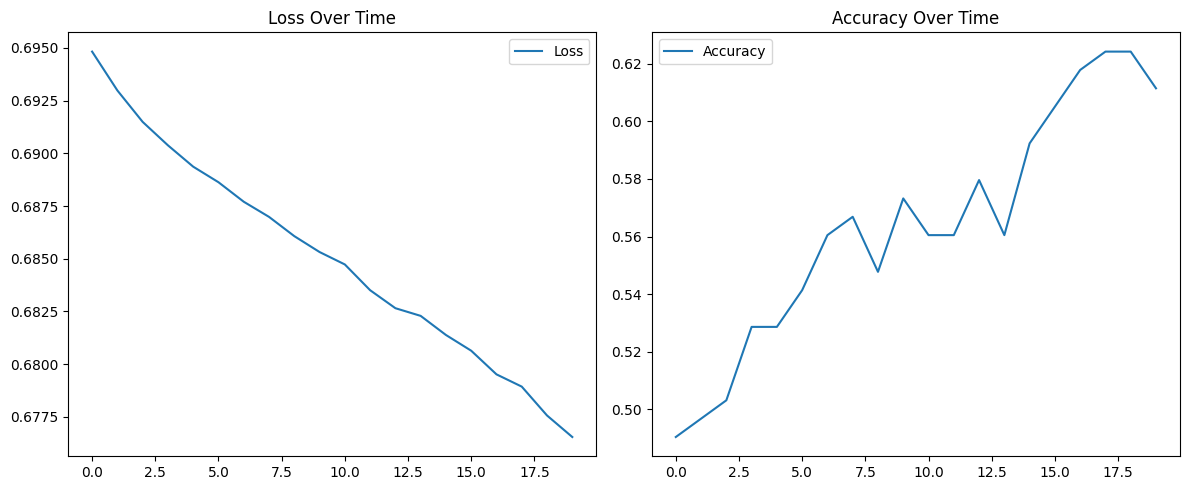

In [7]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.



--- Configuration 1 (3 Layers, Dropout 0.2, Batch 16) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
 [[15 23]
 [ 9 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.39      0.48        38
           1       0.48      0.70      0.57        30

    accuracy                           0.53        68
   macro avg       0.55      0.55      0.53        68
weighted avg       0.56      0.53      0.52        68

Accuracy: 0.5294117647058824


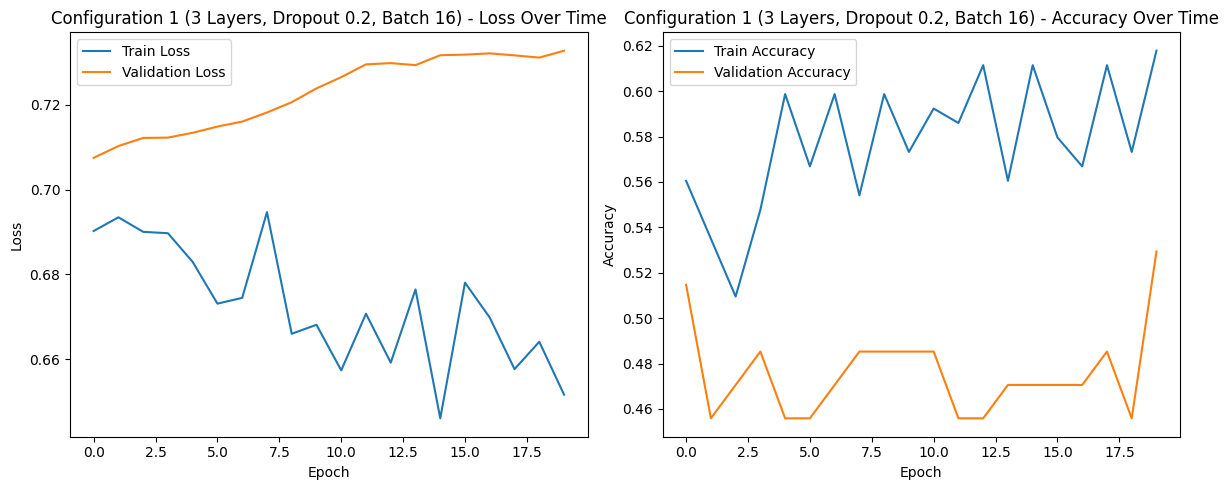


--- Configuration 2 (2 Layers, Dropout 0.3, Batch 32) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix:
 [[18 20]
 [17 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49        38
           1       0.39      0.43      0.41        30

    accuracy                           0.46        68
   macro avg       0.45      0.45      0.45        68
weighted avg       0.46      0.46      0.46        68

Accuracy: 0.45588235294117646


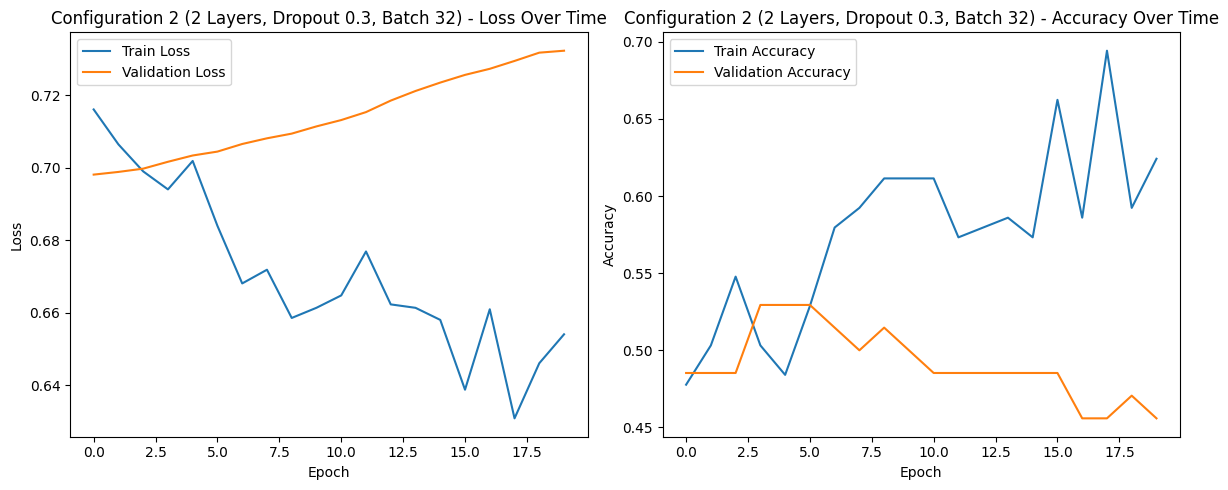


--- Configuration 3 (4 Layers, Dropout 0.2, Batch 8) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
 [[20 18]
 [15 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55        38
           1       0.45      0.50      0.48        30

    accuracy                           0.51        68
   macro avg       0.51      0.51      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


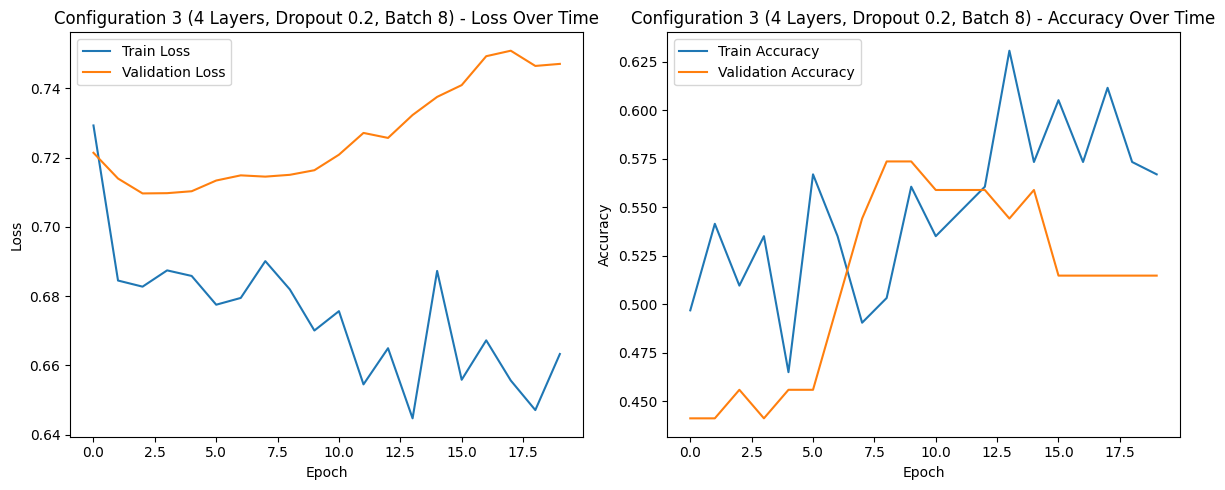


--- Configuration 4 (3 Layers, Dropout 0.25, Batch 24) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
 [[20 18]
 [12 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        38
           1       0.50      0.60      0.55        30

    accuracy                           0.56        68
   macro avg       0.56      0.56      0.56        68
weighted avg       0.57      0.56      0.56        68

Accuracy: 0.5588235294117647


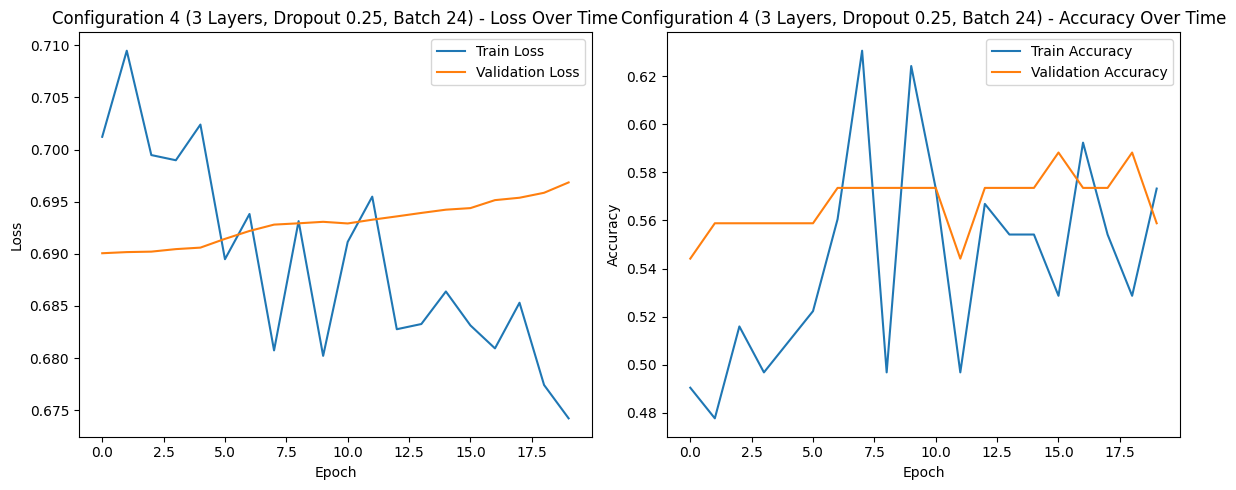


--- Configuration 5 (1 Hidden Layer, Dropout 0.1, Batch 32) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Confusion Matrix:
 [[23 15]
 [15 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        38
           1       0.50      0.50      0.50        30

    accuracy                           0.56        68
   macro avg       0.55      0.55      0.55        68
weighted avg       0.56      0.56      0.56        68

Accuracy: 0.5588235294117647


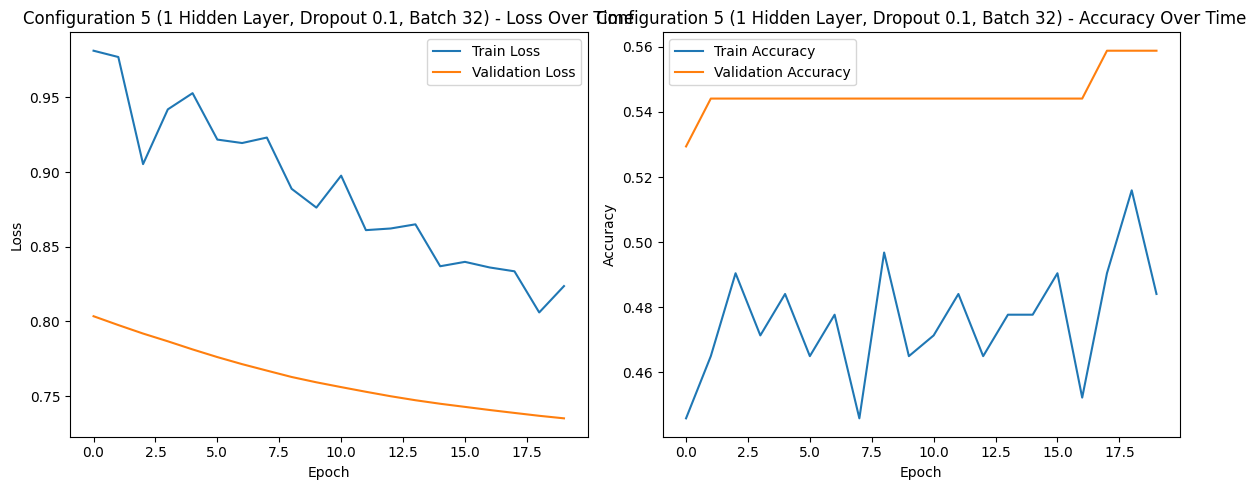

### ✍️ Your Response: 🔧
1. Optimal Layers and Batch Size: Both Configuration 4 (3 Layers: 24, 12, 6 neurons; Batch Size: 24) and Configuration 5 (1 Hidden Layer: 8 neurons; Batch Size: 32) achieved the highest accuracy among the tested combinations, both reaching approximately 0.5588. Since both yielded the same best accuracy with different architectures, there isn't a single 'optimal' in this specific set of trials, but both represent the best performing configurations.

Does adding Dropout help reduce overfitting? Yes, adding Dropout can help reduce overfitting, and its effectiveness can be observed in the 'loss over time' plots. Overfitting is typically indicated when the training loss continues to decrease, but the validation loss starts to increase, showing that the model is memorizing the training data rather than generalizing.

In Configuration 1 (3 Layers, Batch 16) and Configuration 5 (1 Hidden Layer, Batch 32), the plots would ideally show the validation loss either decreasing alongside the training loss or plateauing without a significant increase. This suggests that the Dropout layers, along with the chosen architecture and batch size, helped to regularize the model and allowed it to generalize better to unseen data.
Conversely, in configurations where overfitting might still be an issue (e.g., if the validation loss still significantly diverges from the training loss in configurations like Configuration 3 or Configuration 4 despite Dropout), it would indicate that the chosen Dropout rates might not be sufficient, or the model might still be too complex for the given dataset. Without seeing the actual plots, it's a general interpretation, but the goal of Dropout is to make the model more robust and less prone to memorizing the training set.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
Compare Overall Model Performance: Consolidate and compare the accuracy scores of the best-performing Naive Bayes, SVM, and Neural Network configurations. Determine which model achieved the highest accuracy on the dataset.
Analyze Overfitting and Underfitting: Review the training graphs (loss and accuracy over time for Neural Networks), C-values for SVM, and general accuracy for all models to identify signs of overfitting (e.g., diverging train/validation loss) or underfitting (e.g., consistently low performance).
Recommend Model to Marketing Team: Based on the comprehensive comparison of performance, interpretability, and potential for generalization, recommend the most suitable model for a marketing team and provide a clear justification.
Final Task: Provide a comprehensive response to all three questions, summarizing the findings, insights, and recommendations clearly.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [39]:
!jupyter nbconvert --to html "lab_12_bayes_svm_neural.ipynb"

[NbConvertApp] Converting notebook lab_12_bayes_svm_neural.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 948569 bytes to lab_12_bayes_svm_neural.html
